C:\Users\sagni\AppData\Local\Programs\Python\Python311\Lib\site-packages\matplotlib\cm.py:478: RuntimeWarning: invalid value encountered in cast
  xx = (xx * 255).astype(np.uint8)


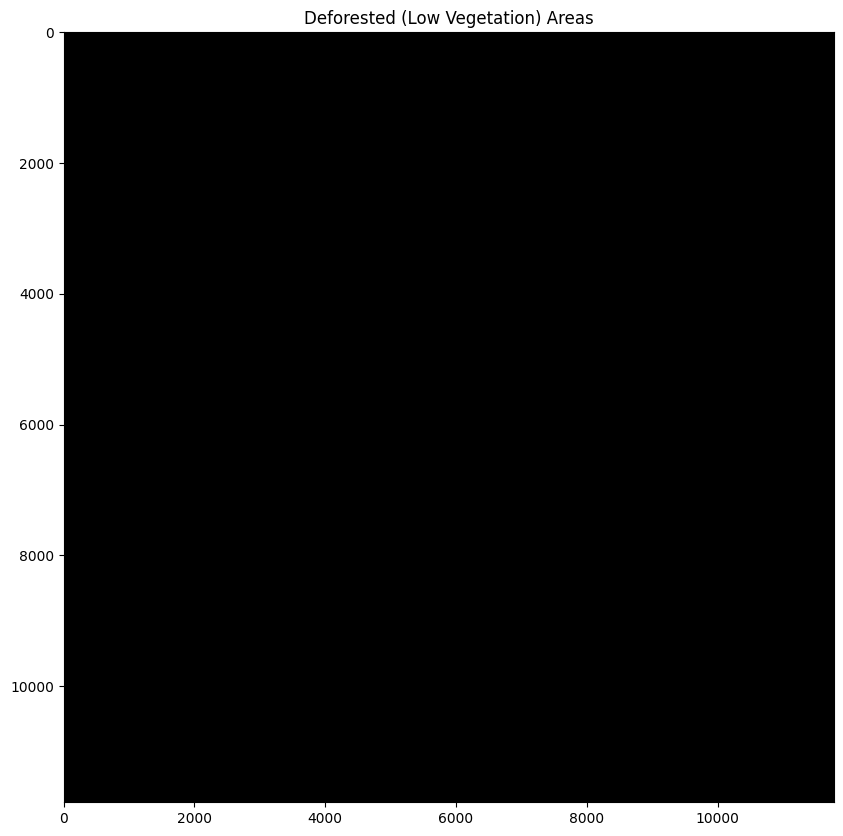

In [1]:
import matplotlib.pyplot as plt
import geopandas as gpd
import numpy as np
import rasterio
from rasterio.plot import show
from shapely.geometry import box
from rasterio.features import shapes
import cv2

# Load mask
def load_mask(mask_path):
    with rasterio.open(mask_path) as src:
        mask = src.read(1)
        profile = src.profile
        transform = src.transform
    return mask, transform, profile

# Get polygons from mask
def mask_to_polygons(mask, transform):
    contours = []
    for shape, val in shapes(mask.astype(np.uint8), transform=transform):
        if val == 1:  # deforested
            contours.append(shape)
    return contours

# Load the saved mask
mask_path = "deforestation_mask.tif"
mask, transform, profile = load_mask(mask_path)
polygons = mask_to_polygons(mask, transform)

# Plot on top of original image
tif_path = r"C:\Users\sagni\Downloads\Deforestation Detection\Western_Ghats_After_2022-0000000000-0000011776.tif"
with rasterio.open(tif_path) as src:
    img = src.read([3, 2, 1])  # RGB
    img = np.transpose(img, (1, 2, 0))
    img = (img - img.min()) / (img.max() - img.min())

plt.figure(figsize=(10, 10))
plt.imshow(img)
plt.title("Deforested (Low Vegetation) Areas")
for poly in polygons:
    coords = np.array(poly['coordinates'][0])
    plt.plot(coords[:, 0], coords[:, 1], color='red', linewidth=1)
plt.show()
